Loading the dataset from the files

In [27]:
import json

# Specify the path to your JSON file
file_path = 'dataset/datasets/10122024/full_level.json'

# Open and load the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

# Display the loaded data
len(data), len(data[0]), len(data[0][0])

(1360, 16, 16)

Import the `ENCODING_MAP`, we'll use this to map from our string data to integer data

In [28]:
from dataset.classes import ENCODING_MAP

In [29]:
ENCODING_MAP

{'-': (0, 0),
 'o': (0, 100),
 'X': (1, 100),
 'S': (0, 115),
 'C': (0, 130),
 'U': (0, 145),
 '?': (0, 160),
 '!': (0, 175),
 '1': (0, 190),
 '2': (0, 205),
 'g': (2, 100),
 'G': (2, 115),
 'k': (2, 130),
 'K': (2, 145),
 'r': (2, 160),
 'R': (2, 175),
 'y': (2, 190),
 'B': (2, 205),
 'b': (2, 220),
 '<': (3, 100),
 '>': (3, 115),
 '(': (3, 130),
 ')': (3, 145),
 '[': (3, 175),
 ']': (3, 190),
 '#': (0, 220),
 'L': (1, 150),
 'E': (2, 220)}

It's also needed a way to revert the mapping from integer to string, in order to generate the rendered version of the level 

In [30]:
from dataset.classes import ENCODING_MAP2

In [31]:

value = ENCODING_MAP2.get_value('X')  
key = ENCODING_MAP2.get_key((2, 100)) 

print(f"Value for key 'X': {value}")
print(f"Key for value (2, 100): {key}")

Value for key 'X': (1, 100)
Key for value (2, 100): g


Converting the Dataset into a Numpy Tensor

In [32]:
import numpy as np 

tensor_list = []
for idx, img_data in enumerate(data):
    # Convert the 16x16 nested list to a numpy array
    tensor = np.zeros((16, 16, 4))
    for i, row in enumerate(img_data):
        for j, value in enumerate(row):
            channel, value = ENCODING_MAP[value]
            tensor[i, j, channel] = value
    tensor_list.append(tensor)

In [33]:
len(tensor_list)

1360

In [34]:
tensor_list[0]

array([[[  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.]],

       [[  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.]],

       [[  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.]],

       ...,

       [[  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.]],

       [[  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        .

Instatiating some utils functions to renderize our levels

In [35]:
from PIL import Image
import numpy as np
tiles_dir = 'dataset/datasets/tiles'
chars2pngs = {
        "-": Image.open(f"{tiles_dir}/smb-background.png"),
        "X": Image.open(f"{tiles_dir}/ground.png"),
        "#": Image.open(f"{tiles_dir}/smb-unpassable.png"),
        "S": Image.open(f"{tiles_dir}/smb-breakable.png"),
        "?": Image.open(f"{tiles_dir}/special_question_block.png"),
        "Q": Image.open(f"{tiles_dir}/special_question_block.png"),
        "o": Image.open(f"{tiles_dir}/coin.png"),
        "E": Image.open(f"{tiles_dir}/blue_goomba.png"),
        "<": Image.open(f"{tiles_dir}/smb-tube-top-left.png"),
        ">": Image.open(f"{tiles_dir}/smb-tube-top-right.png"),
        "(": Image.open(f"{tiles_dir}/white_pipe_top_left.png"),
        ")": Image.open(f"{tiles_dir}/white_pipe_top_right.png"),
        "[": Image.open(f"{tiles_dir}/smb-tube-lower-left.png"),
        "]": Image.open(f"{tiles_dir}/smb-tube-lower-right.png"),
        "x": Image.open(f"{tiles_dir}/smb-path.png"),  # self-created
        "Y": Image.fromarray(
            np.uint8(np.zeros((16, 16)))
        ),  # black square,  # self-created
        "N": Image.open(f"{tiles_dir}/N.png"),  # self-created
        "B": Image.open(f"{tiles_dir}/cannon_top.png"),
        "b": Image.open(f"{tiles_dir}/cannon_bottom.png"),
        "F": Image.open(f"{tiles_dir}/icon_interrogation.png"),

        "C": Image.open(f"{tiles_dir}/yellow_brick.png"), # Coin Brick Block
        "U": Image.open(f"{tiles_dir}/red_brick.png"), # Mushroom Brick Block
        "!": Image.open(f"{tiles_dir}/smb-question.png"), # Question Block (changed from Q)
        "L": Image.open(f"{tiles_dir}/life.png"), # Invisible 1 up block
        "2": Image.open(f"{tiles_dir}/coin2.png"), # Invisible coin block
        "g": Image.open(f"{tiles_dir}/goomba.png"),
        "G": Image.open(f"{tiles_dir}/white_goomba.png"),
        "k": Image.open(f"{tiles_dir}/koopa.png"),
        "K": Image.open(f"{tiles_dir}/winged_koopa.png"),
        "r": Image.open(f"{tiles_dir}/red_koopa.png"),
        "R": Image.open(f"{tiles_dir}/winged_red_koopa.png"),
        "y": Image.open(f"{tiles_dir}/spiny.png"),
        "t": Image.open(f"{tiles_dir}/icon_interrogation.png"),
        "T": Image.open(f"{tiles_dir}/icon_interrogation.png"),
    }

In [36]:
import math
import os
from typing import List, Union
from PIL import Image

def char_array_to_image(array, chars2pngs, target_size=None):
    """
    Convert a 16-by-16 array of integers into a PIL.Image object
    param: array: a 16-by-16 array of integers
    """
    if target_size is None:
        image = Image.new("RGB", (array.shape[1] * 16, array.shape[0] * 16))
    else:
        image = Image.new("RGB", (target_size[1] * 16, target_size[0] * 16))
    # print(array.shape)
    for i in range(array.shape[0]):  # Iterate over rows
        for j in range(array.shape[1]):  # Iterate over columns
            max_value = np.max(array[i, j, :])
            max_index = np.argmax(array[i, j, :])
            #
            # This try execpt block is used to handle the case where the key is not found in the dictionary 
            # this should not be necessary, we need to investigate why this is happening
            #
            try:
                value = chars2pngs[ENCODING_MAP2.get_key((max_index, max_value))]  # Retrieve the item            
            except:
                value = chars2pngs["-"]
            image.paste(value, (j * 16, i * 16))  
    return image

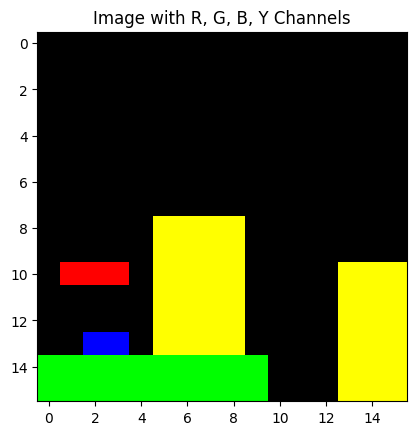

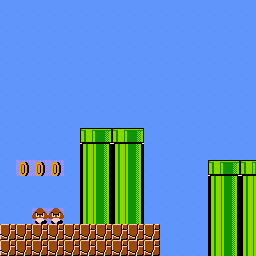

In [37]:
import matplotlib.pyplot as plt

# idx = 20
idx = 163
r = tensor_list[idx][:, :, 0]
g = tensor_list[idx][:, :, 1]
b = tensor_list[idx][:, :, 2]
y = tensor_list[idx][:, :, 3]

# Modify red and green channels based on yellow intensity
r = r + y  # Add yellow to red
g = g + y  # Add yellow to green

# Clip values to the valid range (0-1)
r = np.clip(r, 0, 1)
g = np.clip(g, 0, 1)

rgba_image = np.stack([r, g, b], axis=-1) 

plt.imshow(rgba_image)
plt.title("Image with R, G, B, Y Channels")
plt.show()
char_array_to_image(tensor_list[idx], chars2pngs)

### Handling model output
Until now, we handled cases with the original levels, let's make some functions to handle *continuous values* as the model output will behave like that

In [38]:
# Channel mapping need to be done differently, the must be a better way to do it.

channel_map = {}
for key, value in ENCODING_MAP.items():
    channel = value[0]
    if channel not in channel_map:
        channel_map[channel] = {'-': 0}
    channel_map[channel][key] = value[1]

channel_map

{0: {'-': 0,
  'o': 100,
  'S': 115,
  'C': 130,
  'U': 145,
  '?': 160,
  '!': 175,
  '1': 190,
  '2': 205,
  '#': 220},
 1: {'-': 0, 'X': 100, 'L': 150},
 2: {'-': 0,
  'g': 100,
  'G': 115,
  'k': 130,
  'K': 145,
  'r': 160,
  'R': 175,
  'y': 190,
  'B': 205,
  'b': 220,
  'E': 220},
 3: {'-': 0, '<': 100, '>': 115, '(': 130, ')': 145, '[': 175, ']': 190}}

The following cell performs a proximity operation to get the **"possible"** value that location would be, this is very naive hehe

In [39]:
def map_tensor_to_encoding(tensor, encoding_map):
    # Extract the unique values from the encoding map
    unique_values = [v[1] for v in encoding_map.values()]
    mapped_tensor = np.zeros_like(tensor)
    
    for i in range(tensor.shape[0]):
        for j in range(tensor.shape[1]):
            for k in range(tensor.shape[2]):
                # print(f'tensor[{i, j , k}]',tensor[i,j,k])
                # print(channel_map[k].values())
                closest_value = min(channel_map[k].values(), key=lambda x: abs(x - tensor[i, j, k]))
                if closest_value < 100:
                    closest_value = 0.0
                mapped_tensor[i, j, k] = closest_value

    return mapped_tensor


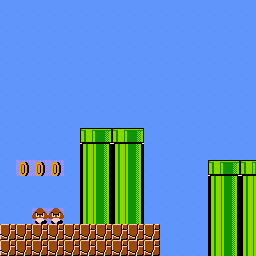

In [40]:
mapped_tensor = map_tensor_to_encoding(tensor_list[idx], ENCODING_MAP)
char_array_to_image(mapped_tensor, chars2pngs)

Aggregating the tensor list from before, so its an actual tensor and normalize it. This enhances the model learning by giving it a more smooth range to aproximate.

In [41]:
aggregated_tensor = np.stack(tensor_list, axis=0)

In [42]:
aggregated_tensor_norm = aggregated_tensor / 255

In [43]:
aggregated_tensor_norm[0]

array([[[0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.      

In [62]:
import keras
import tensorflow as tf

from keras import layers
from keras import ops
import matplotlib.pyplot as plt
import os
# import gdown
from zipfile import ZipFile


In [63]:
discriminator = keras.Sequential(
    [
        keras.Input(shape=(16, 16, 4)),
        layers.Conv2D(16, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2D(64, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2D(64, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid"),
    ],
    name="discriminator",
)
discriminator.summary()


Model: "discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 16)            │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_10 (LeakyReLU)           │ (None, 8, 8, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 64)            │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_11 (LeakyReLU)           │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 2, 2, 64)            │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_12 (LeakyReLU)           │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 83,345 (325.57 KB)

 Trainable params: 83,345 (325.57 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
latent_dim = 128

generator = keras.Sequential(
    [
        keras.Input(shape=(latent_dim,)),
        layers.Dense(4 * 4 * 128),
        layers.Reshape((4, 4, 128)),
        layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2D(4, kernel_size=3, padding="same", activation="sigmoid"),
    ],
    name="generator",
)

In [65]:
@keras.saving.register_keras_serializable(package="MarioGAN")
class MarioGAN(keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super().__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
        self.seed_generator = keras.random.SeedGenerator(1337)
        self.save_losses = {
            "discriminator": [],
            "generator": []
        }

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super().compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn
        self.d_loss_metric = keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = keras.metrics.Mean(name="g_loss")
        self.accuracy_metric = keras.metrics.BinaryAccuracy(name="accuracy")

    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric, self.accuracy_metric]
    @tf.function
    def train_step(self, real_images):
        batch_size = ops.shape(real_images)[0]
        random_latent_vectors = keras.random.normal(
            shape=(batch_size, self.latent_dim), seed=self.seed_generator
        )
        generated_images = self.generator(random_latent_vectors)
        combined_images = ops.concatenate([generated_images, real_images], axis=0)
        labels = ops.concatenate(
            [ops.ones((batch_size, 1)), ops.zeros((batch_size, 1))], axis=0
        )
        labels += 0.05 * tf.random.uniform(tf.shape(labels))

        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
            self.accuracy_metric.update_state(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(
            zip(grads, self.discriminator.trainable_weights)
        )

        random_latent_vectors = keras.random.normal(
            shape=(batch_size, self.latent_dim), seed=self.seed_generator
        )
        misleading_labels = ops.zeros((batch_size, 1))

        with tf.GradientTape() as tape:
            predictions = self.discriminator(self.generator(random_latent_vectors))
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
        self.save_losses["discriminator"].append(self.d_loss_metric.result())
        self.save_losses["generator"].append(self.g_loss_metric.result())
        return {
            "d_loss": self.d_loss_metric.result(),
            "g_loss": self.g_loss_metric.result(),
            "accuracy": self.accuracy_metric.result(),
        }
    @tf.function
    def eval_step(self, real_images):
        batch_size = ops.shape(real_images)[0]
        random_latent_vectors = keras.random.normal(
            shape=(batch_size, self.latent_dim), seed=self.seed_generator
        )
        generated_images = self.generator(random_latent_vectors)
        combined_images = ops.concatenate([generated_images, real_images], axis=0)
        labels = ops.concatenate(
            [ops.ones((batch_size, 1)), ops.zeros((batch_size, 1))], axis=0
        )

        predictions = self.discriminator(combined_images)
        accuracy = self.accuracy_metric.update_state(labels, predictions)
        return {"accuracy": self.accuracy.result()}


In [66]:
class GANMonitor(keras.callbacks.Callback):
    def __init__(self, epoch_step=100, num_img=3, latent_dim=64, log_dir="./logs"):
        self.num_img = num_img
        self.latent_dim = latent_dim
        self.seed_generator = keras.random.SeedGenerator(42)
        self.epoch_step = epoch_step
        self.file_writer = tf.summary.create_file_writer(log_dir)
        self.log_dir = log_dir

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.epoch_step == 0:
            random_latent_vectors = keras.random.normal(
                shape=(self.num_img, self.latent_dim), seed=self.seed_generator
            )
            generated_images = self.model.generator(random_latent_vectors)
            generated_images *= 255
            generated_images = generated_images.numpy()
            
            with self.file_writer.as_default():
                for i in range(self.num_img):
                    r = generated_images[i][:, :, 0]
                    g = generated_images[i][:, :, 1]
                    b = generated_images[i][:, :, 2]
                    y = generated_images[i][:, :, 3]

                    r = r + y  # Add yellow to red
                    g = g + y  # Add yellow to green

                    # Clip values to the valid range (0-1)
                    r = np.clip(r, 0, 1)
                    g = np.clip(g, 0, 1)

                    rgba_image = np.stack([r, g, b], axis=-1)
                    img = keras.utils.array_to_img(rgba_image)
                    img.save(f"{self.log_dir}/generated_img_%03d_%d.png" % (epoch, i))
                    # Log raw image to TensorBoard
                    tf.summary.image(f"Generated Raw Image", np.expand_dims(rgba_image, axis=0), step=epoch)
                    mapped_tensor = map_tensor_to_encoding(generated_images[i], ENCODING_MAP)
                    rendered_image = char_array_to_image(mapped_tensor, chars2pngs)
                    tf.summary.image(f"Generated Rendered Image", np.expand_dims(rendered_image, axis=0), step=epoch)



In [67]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from datetime import datetime

epochs = 5000  # In practice, use ~100 epochs
log_dir_base = './mario_gan_outputs'
if not os.path.exists(log_dir_base):
    os.makedirs(log_dir_base)
    # Generate a log directory based on the current date and time
    current_time = datetime.now().strftime("%Y%m%d-%H%M")
    log_dir_timed = os.path.join(log_dir_base, current_time)
    if not os.path.exists(log_dir_timed):
        os.makedirs(log_dir_timed)
tensorboard_callback = TensorBoard(log_dir=log_dir_timed)

# Define checkpoint directory if it doesn't exist
# Define the checkpoint callback
checkpoint_filepath = os.path.join(log_dir_timed+'/checkpoints', 'gan_checkpoint_{epoch:02d}.keras')
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_freq=5000,  # Save at the end of each epoch
    # save_weights_only=True,  # Save only the model weights
    verbose=1  # Print a message when saving
)

gan = MarioGAN(discriminator=discriminator, generator=generator, latent_dim=latent_dim)
gan.compile(
    d_optimizer=keras.optimizers.Adam(learning_rate=0.0001),# clipvalue=1.0),
    g_optimizer=keras.optimizers.Adam(learning_rate=0.0001),# clipvalue=1.0),
    loss_fn=keras.losses.BinaryCrossentropy(),
)
# log command to execute tensorboard
print(f"Run the following command to execute tensorboard: \n tensorboard --logdir={log_dir_timed}")
gan.fit(
    aggregated_tensor_norm, 
    epochs=epochs, 
    callbacks=[
        GANMonitor(epoch_step=50, num_img=2, latent_dim=latent_dim, log_dir=log_dir_timed), 
        model_checkpoint_callback,
        tensorboard_callback
        ],
    validation_freq=50, 
    batch_size=8,
    verbose=2,
)

Run the following command to execute tensorboard: 
 tensorboard --logdir=./mario_gan_outputs/20241215-2248
Epoch 1/100
170/170 - 4s - 25ms/step - accuracy: 0.0000e+00 - d_loss: 0.3595 - g_loss: 2.0551
Epoch 2/100
170/170 - 1s - 3ms/step - accuracy: 0.0000e+00 - d_loss: 0.2666 - g_loss: 1.5251
Epoch 3/100
170/170 - 1s - 3ms/step - accuracy: 0.0000e+00 - d_loss: 0.1291 - g_loss: 2.9379
Epoch 4/100
170/170 - 1s - 3ms/step - accuracy: 0.0000e+00 - d_loss: 0.6085 - g_loss: 2.7864
Epoch 5/100
170/170 - 1s - 3ms/step - accuracy: 0.0000e+00 - d_loss: 0.2372 - g_loss: 1.7787
Epoch 6/100
170/170 - 1s - 3ms/step - accuracy: 0.0000e+00 - d_loss: 0.1190 - g_loss: 2.7040
Epoch 7/100
170/170 - 1s - 3ms/step - accuracy: 0.0000e+00 - d_loss: 0.0934 - g_loss: 3.3099
Epoch 8/100
170/170 - 1s - 3ms/step - accuracy: 0.0000e+00 - d_loss: 0.0935 - g_loss: 3.7591
Epoch 9/100
170/170 - 1s - 3ms/step - accuracy: 0.0000e+00 - d_loss: 0.4174 - g_loss: 3.1985
Epoch 10/100
170/170 - 1s - 3ms/step - accuracy: 0.0000

In [32]:
random_latent_vectors = keras.random.normal(
                shape=(1, 128)
            )
generated_images = gan.generator(random_latent_vectors)
# generated_images *= 255
output1 = generated_images.numpy()

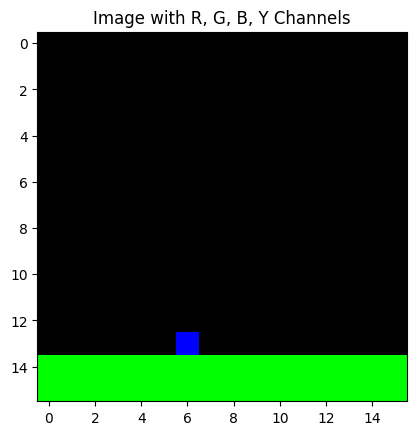

(16, 16, 4)


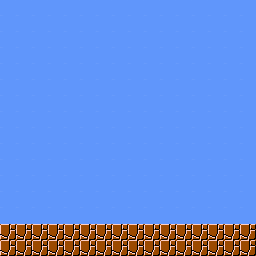

In [33]:
import matplotlib.pyplot as plt

# idx = 20
idx = 32
output1 *= 255
r = output1[0][:, :, 0]
g = output1[0][:, :, 1]
b = output1[0][:, :, 2]
y = output1[0][:, :, 3]

r = r + y  # Add yellow to red
g = g + y  # Add yellow to green

# Clip values to the valid range (0-1)
r = np.clip(r, 0, 1)
g = np.clip(g, 0, 1)

rgba_image = np.stack([r, g, b], axis=-1) 

plt.imshow(rgba_image)
plt.title("Image with R, G, B, Y Channels")
plt.show()
mapped_tensor = map_tensor_to_encoding(output1[0], ENCODING_MAP)
char_array_to_image(mapped_tensor, chars2pngs)

AttributeError: 'Sequential' object has no attribute 'load_model'